# Data Exploration

Let's begin by exploring data in the MIMIC Waveform Database.

Our **objectives** are to:
- Review the structure of the MIMIC Waveform Database (considering subjects, studies, records, and segments).
- Load waveforms using the WFDB toolbox.
- Find out which signals are present in selected records and segments, and how long the signals last.
- Search for records that contain signals of interest.

<div class="alert alert-block alert-warning">
<p><b>Resource:</b> You can find out more about the MIMIC Waveform Database <a href="https://physionet.org/content/mimic4wdb/0.1.0/">here</a>.</p>
</div>

---
## Setup

### Specify the required Python packages
We'll import the following:
- _sys_: an essential python package
- _pathlib_ (well a particular function from _pathlib_, called _Path_)

In [2]:
import sys
from pathlib import Path

### Specify a particular version of the WFDB Toolbox

- _wfdb_: For this workshop we will be using version 4 of the WaveForm DataBase (WFDB) Toolbox package. The package contains tools for processing waveform data such as those found in MIMIC:

In [3]:
import wfdb

<div class="alert alert-block alert-warning">
<p><b>Resource:</b> You can find out more about the WFDB package <a href="https://physionet.org/content/wfdb-python/3.4.1/">here</a>.</p>
</div>

Now that we have imported these packages (_i.e._ toolboxes) we have a set of tools (functions) ready to use.

### Specify the name of the MIMIC Waveform Database

- Specify the name of the MIMIC IV Waveform Database on Physionet, which comes from the URL: https://physionet.org/content/mimic4wdb/0.1.0/

In [4]:
database_name = 'mimic4wdb/0.1.0'

---
## Identify the records in the database

### Get a list of records

- Use the [`get_record_list`](https://wfdb.readthedocs.io/en/latest/io.html#wfdb.io.get_record_list) function from the WFDB toolbox to get a list of records in the database.

In [5]:
# each subject may be associated with multiple records
subjects = wfdb.get_record_list(database_name)
print(f"The '{database_name}' database contains data from {len(subjects)} subjects")

# set max number of records to load
max_records_to_load = 200

The 'mimic4wdb/0.1.0' database contains data from 198 subjects


In [6]:
# iterate the subjects to get a list of records
records = []
for subject in subjects:
    studies = wfdb.get_record_list(f'{database_name}/{subject}')
    for study in studies:
        records.append(Path(f'{subject}{study}'))
        # stop if we've loaded enough records
        if len(records) >= max_records_to_load:
            print("Reached maximum required number of records.")
            break

print(f"Loaded {len(records)} records from the '{database_name}' database.")

Reached maximum required number of records.
Loaded 200 records from the 'mimic4wdb/0.1.0' database.


### Look at the records

- Display the first few records

In [6]:
# format and print first five records
first_five_records = [str(x) for x in records[0:5]]
first_five_records = "\n - ".join(first_five_records)
print(f"First five records: \n - {first_five_records}")

print("""
Note the formatting of these records:
 - intermediate directory ('p100' in this case)
 - subject identifier (e.g. 'p10014354')
 - record identifier (e.g. '81739927'
 """)

First five records: 
 - waves/p100/p10014354/81739927/81739927
 - waves/p100/p10019003/87033314/87033314
 - waves/p100/p10020306/83404654/83404654
 - waves/p100/p10039708/83411188/83411188
 - waves/p100/p10039708/85583557/85583557

Note the formatting of these records:
 - intermediate directory ('p100' in this case)
 - subject identifier (e.g. 'p10014354')
 - record identifier (e.g. '81739927'
 


<div class="alert alert-block alert-info">
<p><b>Q:</b> Can you print the names of the last five records? <br> <b>Hint:</b> in Python, the last five elements can be specified using '[-5:]'</p>
</div>

---
## Extract metadata for a record

Each record contains metadata stored in a header file, named "`<record name>.hea`"

### Specify the online directory containing a record's data

In [7]:
# Specify the 4th record (note, in Python indexing begins at 0)
idx = 3
record = records[idx]
record_dir = f'{database_name}/{record.parent}'
print("PhysioNet directory specified for record: {}".format(record_dir))

PhysioNet directory specified for record: mimic4wdb/0.1.0/waves/p100/p10039708/83411188


### Specify the subject identifier

Extract the record name (e.g. '83411188') from the record (e.g. 'p100/p10039708/83411188/83411188'):

In [8]:
record_name = record.name
print("Record name: {}".format(record_name))

Record name: 83411188


### Load the metadata for this record
- Use the [`rdheader`](https://wfdb.readthedocs.io/en/latest/io.html#wfdb.io.rdheader) function from the WFDB toolbox to load metadata from the record header file

In [9]:
record_data = wfdb.rdheader(record_name, pn_dir=record_dir, rd_segments=True)
remote_url = "https://physionet.org/content/" + record_dir + "/" + record_name + ".hea"
print(f"Done: metadata loaded for record '{record_name}' from the header file at:\n{remote_url}")

Done: metadata loaded for record '83411188' from the header file at:
https://physionet.org/content/mimic4wdb/0.1.0/waves/p100/p10039708/83411188/83411188.hea


---
## Inspect details of physiological signals recorded in this record
- Printing a few details of the signals from the extracted metadata

In [10]:
print(f"- Number of signals: {record_data.n_sig}".format())
print(f"- Duration: {record_data.sig_len/(record_data.fs*60*60):.1f} hours") 
print(f"- Base sampling frequency: {record_data.fs} Hz")

- Number of signals: 6
- Duration: 14.2 hours
- Base sampling frequency: 62.4725 Hz


---
## Inspect the segments making up a record
Each record is typically made up of several segments

In [11]:
segments = record_data.seg_name
print(f"The {len(segments)} segments from record {record_name} are:\n{segments}")

The 6 segments from record 83411188 are:
['83411188_0000', '83411188_0001', '83411188_0002', '83411188_0003', '83411188_0004', '83411188_0005']


The format of filename for each segment is: `record directory, "_", segment number`

---
## Inspect an individual segment
### Read the metadata for this segment
- Read the metadata from the header file

In [12]:
segment_metadata = wfdb.rdheader(record_name=segments[2], pn_dir=record_dir)

print(f"""Header metadata loaded for: 
- the segment '{segments[1]}'
- in record '{record_name}'
- for subject '{str(Path(record_dir).parent.parts[-1])}'
""")

Header metadata loaded for: 
- the segment '83411188_0001'
- in record '83411188'
- for subject 'p10039708'



### Find out what signals are present

In [13]:
print(f"This segment contains the following signals: {segment_metadata.sig_name}")
print(f"The signals are measured in units of: {segment_metadata.units}")

This segment contains the following signals: ['II', 'V', 'aVR', 'ABP', 'Pleth', 'Resp']
The signals are measured in units of: ['mV', 'mV', 'mV', 'mmHg', 'NU', 'Ohm']


See [here](https://archive.physionet.org/mimic2/mimic2_waveform_overview.shtml#signals-125-samplessecond) for definitions of signal abbreviations.

In [14]:
segment_metadata2 = wfdb.rdheader(record_name=segments[5], pn_dir=record_dir)
print(f"This segment contains the following signals: {segment_metadata.sig_name}")
print(f"The signals are measured in units of: {segment_metadata.units}")

This segment contains the following signals: ['II', 'V', 'aVR', 'ABP', 'Pleth', 'Resp']
The signals are measured in units of: ['mV', 'mV', 'mV', 'mmHg', 'NU', 'Ohm']


<div class="alert alert-block alert-info">
<p><b>Q:</b> Which of these signals is no longer present in segment '83411188_0005'?</p>
</div>

### Find out how long each signal lasts

All signals in a segment are time-aligned, measured at the same sampling frequency, and last the same duration:

In [15]:
print(f"The signals have a base sampling frequency of {segment_metadata.fs:.1f} Hz")
print(f"and they last for {segment_metadata.sig_len/(segment_metadata.fs*60):.1f} minutes")

The signals have a base sampling frequency of 62.5 Hz
and they last for 0.9 minutes


## Identify records suitable for analysis

- The signals and their durations vary from one record (and segment) to the next. 
- Since most studies require specific types of signals (e.g. blood pressure and photoplethysmography signals), we need to be able to identify which records (or segments) contain the required signals and duration.

### Setup

In [16]:
import pandas as pd
from pprint import pprint

In [17]:
print(f"Earlier, we loaded {len(records)} records from the '{database_name}' database.")

Earlier, we loaded 200 records from the 'mimic4wdb/0.1.0' database.


### Specify requirements

- Required signals

In [18]:
required_sigs = ['II', 'V']

- Required duration

In [19]:
# convert from minutes to seconds
req_seg_duration = 10*60 

### Find out how many records meet the requirements

_NB: This step may take a while. The results are copied below to save running it yourself._

In [20]:
matching_recs = {'dir':[], 'seg_name':[], 'length':[]}

for record in records:
    print('Record: {}'.format(record), end="", flush=True)
    record_dir = f'{database_name}/{record.parent}'
    record_name = record.name
    print(' (reading data)')
    record_data = wfdb.rdheader(record_name,
                                pn_dir=record_dir,
                                rd_segments=True)

    # Check whether the required signals are present in the record
    sigs_present = record_data.sig_name
    if not all(x in sigs_present for x in required_sigs):
        print('   (missing signals)')
        continue

    # Get the segments for the record
    segments = record_data.seg_name

    # Check to see if the segment is 10 min long
    # If not, move to the next one
    gen = (segment for segment in segments if segment != '~')
    for segment in gen:
        print(' - Segment: {}'.format(segment), end="", flush=True)
        segment_metadata = wfdb.rdheader(record_name=segment,
                                         pn_dir=record_dir)
        seg_length = segment_metadata.sig_len/(segment_metadata.fs)

        if seg_length < req_seg_duration:
            print(f' (too short at {seg_length/60:.1f} mins)')
            continue

        # Next check that all required signals are present in the segment
        sigs_present = segment_metadata.sig_name
        
        if all(x in sigs_present for x in required_sigs):
            matching_recs['dir'].append(record_dir)
            matching_recs['seg_name'].append(segment)
            matching_recs['length'].append(seg_length)
            print(' (met requirements)')
            # Since we only need one segment per record break out of loop
            break
        else:
            print(' (long enough, but missing signal(s))')

print(f"A total of {len(matching_recs['dir'])} records met the requirements:")

#df_matching_recs = pd.DataFrame(data=matching_recs)
#df_matching_recs.to_csv('matching_records.csv', index=False)
#p=1

Record: waves/p100/p10014354/81739927/81739927 (reading data)
 - Segment: 81739927_0000 (too short at 0.0 mins)
 - Segment: 81739927_0001 (too short at 0.1 mins)
 - Segment: 81739927_0002 (too short at 0.9 mins)
 - Segment: 81739927_0003 (too short at 0.1 mins)
 - Segment: 81739927_0004 (too short at 0.0 mins)
 - Segment: 81739927_0005 (too short at 0.5 mins)
 - Segment: 81739927_0006 (too short at 0.1 mins)
 - Segment: 81739927_0007 (too short at 0.0 mins)
 - Segment: 81739927_0008 (met requirements)
Record: waves/p100/p10019003/87033314/87033314 (reading data)
 - Segment: 87033314_0000 (too short at 0.0 mins)
 - Segment: 87033314_0001 (too short at 5.2 mins)
 - Segment: 87033314_0002 (too short at 0.1 mins)
 - Segment: 87033314_0003 (too short at 0.0 mins)
 - Segment: 87033314_0004 (too short at 0.1 mins)
 - Segment: 87033314_0005 (met requirements)
Record: waves/p100/p10020306/83404654/83404654 (reading data)
 - Segment: 83404654_0000 (too short at 0.0 mins)
 - Segment: 83404654_000

 - Segment: 83268087_0121 (too short at 0.0 mins)
 - Segment: 83268087_0122 (too short at 0.1 mins)
 - Segment: 83268087_0123 (too short at 0.3 mins)
 - Segment: 83268087_0124 (too short at 0.0 mins)
 - Segment: 83268087_0125 (too short at 0.0 mins)
 - Segment: 83268087_0126 (long enough, but missing signal(s))
 - Segment: 83268087_0127 (too short at 0.0 mins)
 - Segment: 83268087_0128 (too short at 0.1 mins)
 - Segment: 83268087_0129 (met requirements)
Record: waves/p101/p10112163/88501826/88501826 (reading data)
 - Segment: 88501826_0000 (too short at 0.0 mins)
 - Segment: 88501826_0001 (too short at 0.9 mins)
 - Segment: 88501826_0002 (too short at 1.3 mins)
 - Segment: 88501826_0003 (too short at 0.3 mins)
 - Segment: 88501826_0004 (too short at 0.0 mins)
 - Segment: 88501826_0005 (too short at 0.0 mins)
 - Segment: 88501826_0006 (too short at 0.1 mins)
 - Segment: 88501826_0007 (too short at 0.0 mins)
 - Segment: 88501826_0008 (met requirements)
Record: waves/p101/p10126957/829243

 - Segment: 85982742_0001 (too short at 1.5 mins)
Record: waves/p122/p12246674/81515145/81515145 (reading data)
 - Segment: 81515145_0000 (too short at 0.0 mins)
 - Segment: 81515145_0001 (too short at 0.1 mins)
 - Segment: 81515145_0002 (too short at 3.2 mins)
 - Segment: 81515145_0003 (too short at 0.2 mins)
 - Segment: 81515145_0004 (too short at 0.0 mins)
 - Segment: 81515145_0005 (too short at 0.1 mins)
 - Segment: 81515145_0006 (too short at 0.1 mins)
 - Segment: 81515145_0007 (too short at 0.0 mins)
 - Segment: 81515145_0008 (met requirements)
Record: waves/p122/p12290932/84513510/84513510 (reading data)
 - Segment: 84513510_0000 (too short at 0.0 mins)
 - Segment: 84513510_0001 (too short at 0.1 mins)
 - Segment: 84513510_0002 (met requirements)
Record: waves/p122/p12295067/86906600/86906600 (reading data)
 - Segment: 86906600_0000 (too short at 0.0 mins)
 - Segment: 86906600_0001 (too short at 4.5 mins)
 - Segment: 86906600_0002 (too short at 0.1 mins)
 - Segment: 86906600_000

 - Segment: 81178488_0000 (too short at 0.0 mins)
 - Segment: 81178488_0001 (too short at 0.0 mins)
 - Segment: 81178488_0002 (too short at 0.1 mins)
 - Segment: 81178488_0003 (too short at 0.6 mins)
 - Segment: 81178488_0004 (met requirements)
Record: waves/p137/p13791821/82803505/82803505 (reading data)
 - Segment: 82803505_0000 (too short at 0.0 mins)
 - Segment: 82803505_0001 (too short at 0.1 mins)
 - Segment: 82803505_0002 (met requirements)
Record: waves/p138/p13840756/85241465/85241465 (reading data)
 - Segment: 85241465_0000 (too short at 0.0 mins)
 - Segment: 85241465_0001 (too short at 0.3 mins)
 - Segment: 85241465_0002 (too short at 0.1 mins)
 - Segment: 85241465_0003 (too short at 0.0 mins)
 - Segment: 85241465_0004 (too short at 0.1 mins)
 - Segment: 85241465_0005 (too short at 0.0 mins)
 - Segment: 85241465_0006 (too short at 0.1 mins)
 - Segment: 85241465_0007 (met requirements)
Record: waves/p139/p13909615/85874778/85874778 (reading data)
 - Segment: 85874778_0000 (to

 - Segment: 87509018_0003 (too short at 1.4 mins)
 - Segment: 87509018_0004 (too short at 0.6 mins)
 - Segment: 87509018_0005 (too short at 5.0 mins)
 - Segment: 87509018_0006 (too short at 0.4 mins)
 - Segment: 87509018_0007 (met requirements)
Record: waves/p165/p16547220/81902403/81902403 (reading data)
 - Segment: 81902403_0000 (too short at 0.0 mins)
 - Segment: 81902403_0001 (too short at 0.3 mins)
 - Segment: 81902403_0002 (met requirements)
Record: waves/p165/p16566444/80057524/80057524 (reading data)
 - Segment: 80057524_0000 (too short at 0.0 mins)
 - Segment: 80057524_0001 (met requirements)
Record: waves/p165/p16587972/86803944/86803944 (reading data)
   (missing signals)
Record: waves/p166/p16601928/88159741/88159741 (reading data)
 - Segment: 88159741_0000 (too short at 0.0 mins)
 - Segment: 88159741_0001 (met requirements)
Record: waves/p166/p16644640/84209926/84209926 (reading data)
 - Segment: 84209926_0000 (too short at 0.0 mins)
 - Segment: 84209926_0001 (too short at

 - Segment: 84486962_0000 (too short at 0.0 mins)
 - Segment: 84486962_0001 (too short at 3.6 mins)
 - Segment: 84486962_0002 (too short at 0.5 mins)
 - Segment: 84486962_0003 (too short at 0.2 mins)
 - Segment: 84486962_0004 (too short at 0.0 mins)
 - Segment: 84486962_0005 (too short at 0.1 mins)
 - Segment: 84486962_0006 (too short at 0.4 mins)
 - Segment: 84486962_0007 (too short at 0.3 mins)
 - Segment: 84486962_0008 (too short at 0.5 mins)
 - Segment: 84486962_0009 (met requirements)
Record: waves/p174/p17490822/85814172/85814172 (reading data)
 - Segment: 85814172_0000 (too short at 0.0 mins)
 - Segment: 85814172_0001 (too short at 2.1 mins)
 - Segment: 85814172_0002 (too short at 0.4 mins)
 - Segment: 85814172_0003 (met requirements)
Record: waves/p175/p17549883/88582885/88582885 (reading data)
 - Segment: 88582885_0000 (too short at 0.0 mins)
 - Segment: 88582885_0001 (met requirements)
Record: waves/p175/p17578102/83863589/83863589 (reading data)
 - Segment: 83863589_0000 (to

 - Segment: 82141753_0006 (too short at 0.0 mins)
 - Segment: 82141753_0007 (too short at 0.7 mins)
 - Segment: 82141753_0008 (too short at 3.0 mins)
 - Segment: 82141753_0009 (too short at 0.1 mins)
 - Segment: 82141753_0010 (too short at 5.0 mins)
 - Segment: 82141753_0011 (met requirements)
Record: waves/p181/p18111015/86297093/86297093 (reading data)
 - Segment: 86297093_0000 (too short at 0.0 mins)
 - Segment: 86297093_0001 (met requirements)
Record: waves/p181/p18195790/89743206/89743206 (reading data)
 - Segment: 89743206_0000 (too short at 0.0 mins)
 - Segment: 89743206_0001 (too short at 0.1 mins)
 - Segment: 89743206_0002 (too short at 2.5 mins)
 - Segment: 89743206_0003 (too short at 0.3 mins)
 - Segment: 89743206_0004 (too short at 0.8 mins)
 - Segment: 89743206_0005 (too short at 0.1 mins)
 - Segment: 89743206_0006 (too short at 0.6 mins)
 - Segment: 89743206_0007 (met requirements)
Record: waves/p183/p18324626/86874920/86874920 (reading data)
 - Segment: 86874920_0000 (to

 - Segment: 86288257_0001 (met requirements)
Record: waves/p188/p18881392/85145725/85145725 (reading data)
   (missing signals)
Record: waves/p189/p18981843/86164656/86164656 (reading data)
 - Segment: 86164656_0000 (too short at 0.0 mins)
 - Segment: 86164656_0001 (long enough, but missing signal(s))
 - Segment: 86164656_0002 (too short at 0.1 mins)
 - Segment: 86164656_0003 (too short at 0.0 mins)
 - Segment: 86164656_0004 (too short at 0.1 mins)
 - Segment: 86164656_0005 (too short at 9.1 mins)
 - Segment: 86164656_0006 (too short at 0.0 mins)
 - Segment: 86164656_0007 (too short at 0.1 mins)
 - Segment: 86164656_0008 (too short at 0.3 mins)
 - Segment: 86164656_0009 (too short at 0.2 mins)
 - Segment: 86164656_0010 (too short at 0.0 mins)
 - Segment: 86164656_0011 (too short at 0.1 mins)
 - Segment: 86164656_0012 (too short at 0.0 mins)
 - Segment: 86164656_0013 (too short at 1.8 mins)
 - Segment: 86164656_0014 (too short at 0.1 mins)
 - Segment: 86164656_0015 (too short at 0.0 min

 - Segment: 88537698_0005 (too short at 0.1 mins)
 - Segment: 88537698_0006 (too short at 0.0 mins)
 - Segment: 88537698_0007 (too short at 0.1 mins)
 - Segment: 88537698_0008 (too short at 5.0 mins)
 - Segment: 88537698_0009 (too short at 0.8 mins)
 - Segment: 88537698_0010 (too short at 0.3 mins)
 - Segment: 88537698_0011 (met requirements)
Record: waves/p193/p19396598/82093805/82093805 (reading data)
 - Segment: 82093805_0000 (too short at 0.0 mins)
 - Segment: 82093805_0001 (too short at 1.5 mins)
 - Segment: 82093805_0002 (too short at 0.1 mins)
 - Segment: 82093805_0003 (too short at 0.0 mins)
 - Segment: 82093805_0004 (too short at 0.0 mins)
 - Segment: 82093805_0005 (too short at 3.4 mins)
 - Segment: 82093805_0006 (too short at 1.4 mins)
 - Segment: 82093805_0007 (too short at 0.5 mins)
 - Segment: 82093805_0008 (too short at 6.9 mins)
 - Segment: 82093805_0009 (too short at 0.3 mins)
 - Segment: 82093805_0010 (too short at 0.6 mins)
 - Segment: 82093805_0011 (met requirements

In [21]:
print(f"A total of {len(matching_recs['dir'])} out of {len(records)} records met the requirements.")

relevant_segments_names = "\n - ".join(matching_recs['seg_name'])
print(f"\nThe relevant segment names are:\n - {relevant_segments_names}")

relevant_dirs = "\n - ".join(matching_recs['dir'])
print(f"\nThe corresponding directories are: \n - {relevant_dirs}")

A total of 170 out of 200 records met the requirements.

The relevant segment names are:
 - 81739927_0008
 - 87033314_0005
 - 83404654_0001
 - 83411188_0005
 - 85583557_0001
 - 85594648_0001
 - 83268087_0129
 - 88501826_0008
 - 82924339_0007
 - 84248019_0005
 - 88399302_0001
 - 88374538_0012
 - 86426168_0014
 - 81826943_0010
 - 82439920_0004
 - 82432904_0007
 - 82800131_0002
 - 81312415_0008
 - 84304393_0001
 - 82650378_0001
 - 88733244_0006
 - 88636340_0002
 - 87942784_0007
 - 86130599_0001
 - 81602645_0001
 - 88867862_0001
 - 89464742_0001
 - 88958796_0004
 - 88995377_0001
 - 81515145_0008
 - 84513510_0002
 - 86906600_0007
 - 88826653_0008
 - 81741333_0001
 - 80674263_0001
 - 85393521_0006
 - 82552643_0001
 - 85835247_0001
 - 80154334_0001
 - 81739815_0001
 - 83054955_0003
 - 85230771_0004
 - 84094519_0002
 - 86643930_0001
 - 81250824_0005
 - 85361504_0001
 - 87473566_0001
 - 87023605_0006
 - 82342224_0005
 - 81815063_0001
 - 87706224_0003
 - 82697127_0002
 - 88841356_0001
 - 8020041

<div class="alert alert-block alert-info">
<p><b>Question:</b> Is this enough data for a study? Consider different types of studies, e.g. assessing the performance of a previously proposed algorithm to estimate BP from the PPG signal, vs. developing a deep learning approach to estimate BP from the PPG.</p>
</div>

## Data Extraction

In [7]:
segment_names = ['83404654_0005']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654']

In [8]:
rel_segment_no = 0
rel_segment_name = segment_names[rel_segment_no]
rel_segment_dir = segment_dirs[rel_segment_no]
print(f"Specified segment '{rel_segment_name}' in directory: '{rel_segment_dir}'")

Specified segment '83404654_0005' in directory: 'mimic4wdb/0.1.0/waves/p100/p10020306/83404654'


In [9]:
segment_data = wfdb.rdrecord(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
print(f"Data loaded from segment: {rel_segment_name}")

Data loaded from segment: 83404654_0005


In [10]:
print(f"Data stored in class of type: {type(segment_data)}")

Data stored in class of type: <class 'wfdb.io.record.Record'>


In [11]:
print(f"This segment contains waveform data for the following {segment_data.n_sig} signals: {segment_data.sig_name}")
print(f"The signals are sampled at a base rate of {segment_data.fs} Hz (and some are sampled at multiples of this)")
print(f"They last for {segment_data.sig_len/(60*segment_data.fs):.1f} minutes")

This segment contains waveform data for the following 6 signals: ['II', 'V', 'aVR', 'ABP', 'Pleth', 'Resp']
The signals are sampled at a base rate of 62.4725 Hz (and some are sampled at multiples of this)
They last for 52.4 minutes


In [12]:
from pprint import pprint
pprint(vars(segment_data))

{'adc_gain': [200.0, 200.0, 200.0, 16.0, 4096.0, 4093.0],
 'adc_res': [14, 14, 14, 13, 12, 12],
 'adc_zero': [8192, 8192, 8192, 4096, 2048, 2048],
 'base_counter': 10219520.0,
 'base_date': None,
 'base_time': None,
 'baseline': [8192, 8192, 8192, 800, 0, 2],
 'block_size': [0, 0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None, None],
 'checksum': [10167, 1300, 56956, 35887, 29987, 21750],
 'comments': ['signal 0 (II): channel=0 bandpass=[0.5,35]',
              'signal 1 (V): channel=1 bandpass=[0.5,35]',
              'signal 2 (aVR): channel=2 bandpass=[0.5,35]'],
 'counter_freq': 999.56,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['83404654_0005e.dat',
               '83404654_0005e.dat',
               '83404654_0005e.dat',
               '83404654_0005p.dat',
               '83404654_0005p.dat',
               '83404654_0005r.dat'],
 'fmt': ['516', '516', '516', '516', '516', '516'],
 'fs': 62.4725,
 'init_value': [0, 0, 0, 0, 0, 0],
 '

# Data Visualization

In [13]:
segment_names = ['83404654_0005', '82924339_0007']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654',
                'mimic4wdb/0.1.0/waves/p101/p10126957/82924339']

In [14]:
rel_segment_n = 1
rel_segment_name = segment_names[rel_segment_n]
rel_segment_dir = segment_dirs[rel_segment_n]
print(f"Specified segment '{rel_segment_name}' in directory: '{rel_segment_dir}'")

Specified segment '82924339_0007' in directory: 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339'


## Extract one minute of data from this segment

In [15]:
# time since the start of the segment at which to begin extracting data
start_seconds = 20
n_seconds_to_load = 60

In [16]:
segment_metadata = wfdb.rdheader(record_name=rel_segment_name,
                                 pn_dir=rel_segment_dir)

print(f"Metadata loaded from segment: {rel_segment_name}")
fs = round(segment_metadata.fs)

Metadata loaded from segment: 82924339_0007


In [17]:
sampfrom = fs * start_seconds
sampto = fs * (start_seconds + n_seconds_to_load)

segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir)

print(f"{n_seconds_to_load} seconds of data extracted from segment {rel_segment_name}")

60 seconds of data extracted from segment 82924339_0007


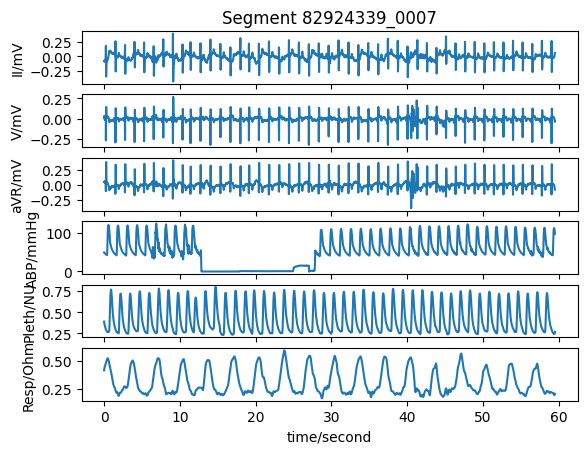

In [18]:
title_text = f"Segment {rel_segment_name}"
wfdb.plot_wfdb(record=segment_data,
               title=title_text,
               time_units='seconds') 

## Extract PPG signal

In [34]:
for sig_no in range(0, len(segment_data.sig_name)):
    if "Pleth" in segment_data.sig_name[sig_no]:
        break

ppg = segment_data.p_signal[:, sig_no]
fs = segment_data.fs
print(f"Extracted the PPG signal from column {sig_no} of the matrix of waveform data.")

Extracted the PPG signal from column 4 of the matrix of waveform data.


(50.0, 55.0)

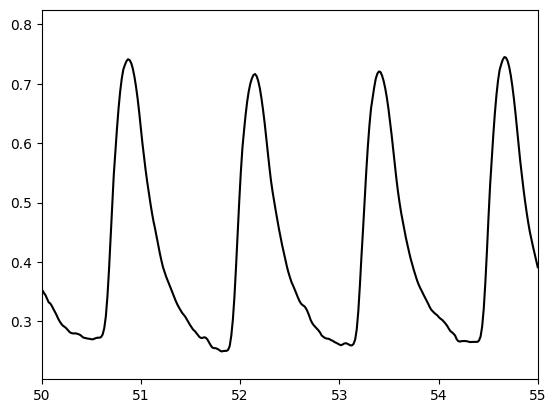

In [35]:
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, (len(ppg) / fs), 1.0 / fs)
plt.plot(t, ppg, color = 'black', label='PPG')
plt.xlim([50, 55])

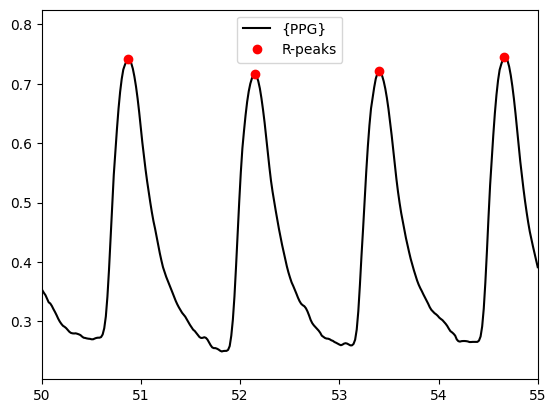

In [36]:
import numpy as np
from scipy.signal import find_peaks

# Set the window size for peak detection
window_size = int(2 * fs) # 2 seconds

# Find the maximum signal value within each window
max_values = []
for i in range(0, len(ppg), window_size):
    if i + window_size <= len(ppg):
        max_values.append(np.max(ppg[i:i+window_size]))
    else:
        max_values.append(np.max(ppg[i:]))

# Set the threshold for peak detection
threshold = 0.45 * np.max(max_values)

# Detect the peaks
ppgpeak, _ = find_peaks(ppg, height=threshold)

# Plot the normalized ECG signal with the detected R-peaks
t = np.arange(0, (len(ppg) / fs), 1.0 / fs)
plt.plot(t, ppg, color='black', label='{PPG}')
plt.plot(t[ppgpeak], ppg[ppgpeak], 'ro', label='R-peaks')
plt.xlim([50, 55])
plt.legend()
plt.show()


# Extract ECG signal

In [37]:
for sig_no in range(0, len(segment_data.sig_name)):
    if "II" in segment_data.sig_name[sig_no]:
        break

ecg = segment_data.p_signal[:, sig_no]
fs = segment_data.fs
print(f"Extracted the II signal from column {sig_no} of the matrix of waveform data.")

Extracted the II signal from column 0 of the matrix of waveform data.


(50.0, 55.0)

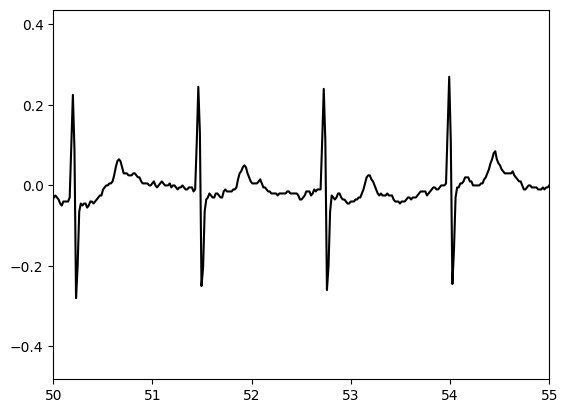

In [38]:
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, (len(ecg) / fs), 1.0 / fs)
plt.plot(t, ecg, color = 'black', label='ECG')
plt.xlim([50, 55])

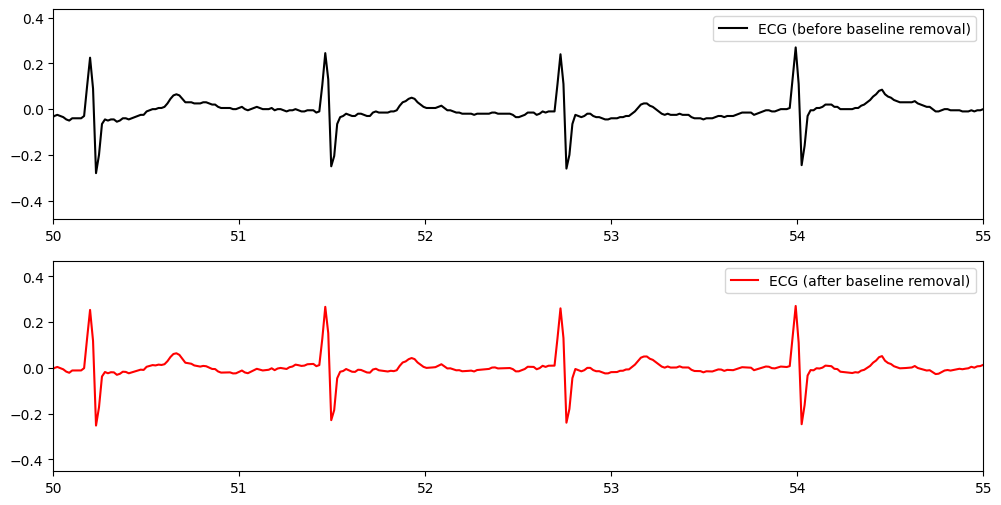

In [39]:
import pywt

# Apply baseline removal using wavelet transform
wavelet = 'db4' # Select the type of wavelet
level = 5 # Select the number of levels for decomposition
decomp = pywt.wavedec(ecg, wavelet, level=level)
cA5, cD5, cD4, cD3, cD2, cD1 = decomp
cA5.fill(0) # Set the approximation coefficients at the coarsest scale to 0
ecg_base = pywt.waverec([cA5, cD5, cD4, cD3, cD2, cD1], wavelet) # Reconstruct the signal

# Plot the ECG signal before and after baseline removal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, ecg, color='black', label='ECG (before baseline removal)')
plt.xlim([50, 55])
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, ecg_base, color='red', label='ECG (after baseline removal)')
plt.xlim([50, 55])
plt.legend()
plt.show()


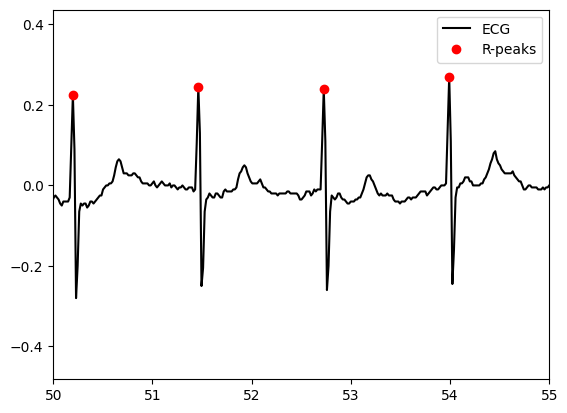

In [40]:
import numpy as np
from scipy.signal import find_peaks


# Set the window size for peak detection
window_size = int(2 * fs) # 2 seconds

# Find the maximum signal value within each window
max_values = []
for i in range(0, len(ecg), window_size):
    if i + window_size <= len(ecg):
        max_values.append(np.max(ecg[i:i+window_size]))
    else:
        max_values.append(np.max(ecg[i:]))

# Set the threshold for peak detection
threshold = 0.45 * np.max(max_values)

# Detect the peaks
peaks_ecg, _ = find_peaks(ecg, height=threshold)

# Plot the normalized ECG signal with the detected R-peaks
t = np.arange(0, (len(ecg) / fs), 1.0 / fs)
plt.plot(t, ecg, color='black', label='ECG')
plt.plot(t[peaks_ecg], ecg[peaks_ecg], 'ro', label='R-peaks')
plt.xlim([50, 55])
plt.legend()
plt.show()


[ 0.40274136  0.40274136  0.47824505  0.40274136 -2.54190269  0.32912526
  0.40274136  1.56275265  0.1872796   0.1872796   0.1872796  -2.66682698
  1.06632312  0.1872796   0.11892024 -2.66682698  0.1872796   0.1872796
  0.1872796   0.25732684  0.1872796   0.1872796   0.25732684  0.1872796
  0.25732684  0.25732684  0.25732684 -2.61460995  0.40274136 -2.523147
  0.40274136  0.47824505  0.32912526  0.40274136  0.40274136  0.40274136
  0.40274136  0.40274136  0.32912526  0.40274136  0.32912526]


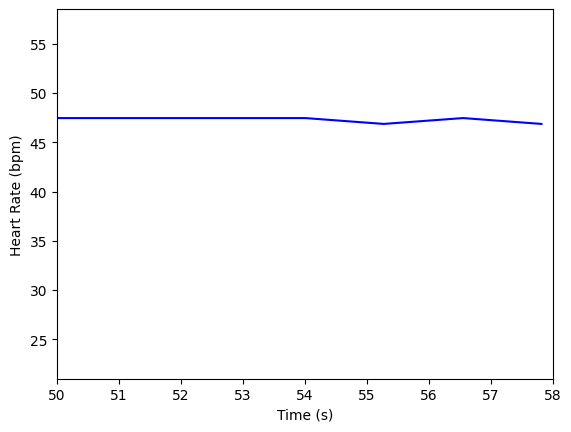

In [41]:
# Calculate the time interval between R-peaks
rr_intervals = np.diff(peaks_ecg) / fs

# Calculate HR from R-R intervals
hr = 60 / rr_intervals

# Calculate the mean and standard deviation of the heart rate
hr_mean = np.mean(hr)
hr_std = np.std(hr)

# Normalize the heart rate
hr_norm = (hr - hr_mean) / hr_std

print(hr_norm)

# Plot the HR over time
t_hr = t[1:][peaks_ecg[:-1]]
plt.plot(t_hr, hr, color='blue')
plt.xlim([50, 58])
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (bpm)')
plt.show()




# PTT


In [42]:
# Find the time stamps of the R-peaks in the ECG and PPG signals
t_ecg = peaks_ecg / fs
t_ppg = ppgpeak / fs

# Find the time differences between the corresponding R-peaks in the two signals
ptt = []
for i in range(len(t_ecg)):
    if i < len(t_ppg):
        ptt.append(t_ppg[i] - t_ecg[i])
ptt_mean = np.mean(ptt)
ptt_std = np.std(ptt)
ptt_norm = (ptt - ptt_mean)/ptt_std
print(ptt_norm)




# # Print the PTT
# print("PTT between ECG and PPG:", np.mean(ptt), "s")


[ 1.64849488  1.64849488  1.64123279  1.64849488  1.64849488  1.07478962
  1.06752752  1.07478962  1.16919681  1.05300334  1.04574125  1.04574125
  0.4502497   0.53739481  0.53739481  0.4502497  -0.15976602 -0.14524184
 -0.13797975 -0.13797975 -0.13071766 -0.13071766 -0.13797975 -0.12345556
 -0.11619347 -0.12345556 -0.12345556 -0.11619347 -0.71168502 -0.68989874
 -1.24181773 -1.22729355 -1.21276936 -1.22003146 -1.23455564 -1.22729355
 -1.22729355 -1.23455564 -1.22729355 -1.23455564 -1.22729355 -1.24181773]


# Extracting Respiration

In [19]:
for sig_no in range(0, len(segment_data.sig_name)):
    if "Resp" in segment_data.sig_name[sig_no]:
        break

resp = segment_data.p_signal[:, sig_no]
fs = segment_data.fs
print(f"Extracted the Resp signal from column {sig_no} of the matrix of waveform data.")

Extracted the Resp signal from column 5 of the matrix of waveform data.


(45.0, 60.0)

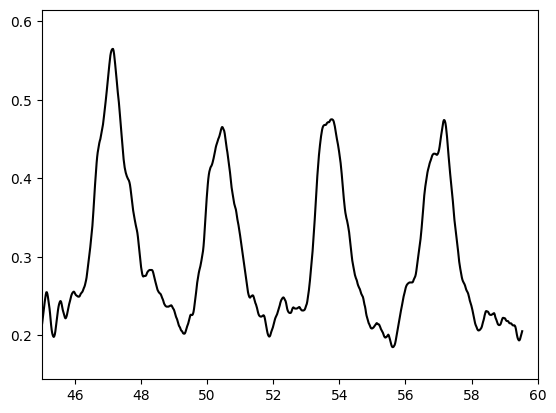

In [20]:
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, (len(resp) / fs), 1.0 / fs)
plt.plot(t, resp, color = 'black', label='Res')
plt.xlim([45, 60])

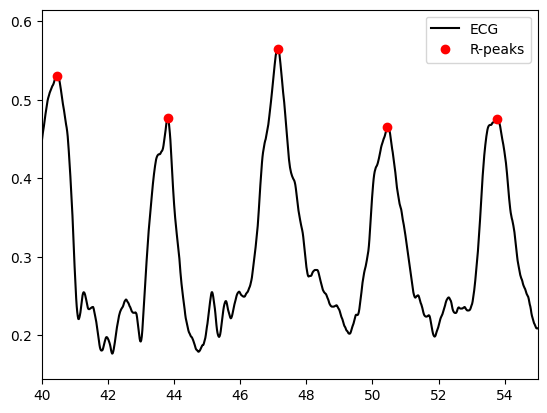

In [24]:
from scipy.signal import find_peaks

# Set the window size for peak detection
window_size = int(2 * fs) # 2 seconds

# Find the maximum signal value within each window
max_values = []
for i in range(0, len(resp), window_size):
    if i + window_size <= len(resp):
        max_values.append(np.max(resp[i:i+window_size]))
    else:
        max_values.append(np.max(resp[i:]))

# Set the threshold for peak detection
threshold = 0.55 * np.max(max_values)

# Detect the peaks
peaks_ecg, _ = find_peaks(resp, height=threshold)

# Plot the normalized ECG signal with the detected R-peaks
t = np.arange(0, (len(resp) / fs), 1.0 / fs)
plt.plot(t, resp, color='black', label='ECG')
plt.plot(t[peaks_ecg], resp[peaks_ecg], 'ro', label='R-peaks')
plt.xlim([40, 55])
plt.legend()
plt.show()


## Blood Pressure

In [45]:
for sig_no in range(0, len(segment_data.sig_name)):
    if "ABP" in segment_data.sig_name[sig_no]:
        break

ppg = segment_data.p_signal[:, sig_no]
fs = segment_data.fs
print(f"Extracted the Resp signal from column {sig_no} of the matrix of waveform data.")

Extracted the Resp signal from column 3 of the matrix of waveform data.
